In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas import read_csv
from datetime import datetime

In [2]:
df = pd.read_excel('Data Sheet for Interns.xlsx',parse_dates=True)

In [3]:
#Eliminate unnamed rows
new_columns=df.iloc[0]
new_df=pd.DataFrame(df.values[1:],columns=new_columns)

In [4]:
new_df.head()

,Month,Counsellor Name,Course Name,Fees Total,Fees Received,Fees Pending
0,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-04-01 00:00:00,SK,CADM,5000,5000,0
2,2020-04-01 00:00:00,SK,CDCW,7500,7500,0
3,2020-04-01 00:00:00,SK,CDCW,9500,9500,0
4,2020-04-01 00:00:00,IJ,NaN,9500,9500,0


In [5]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2878 entries, 0 to 2877
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Month            2719 non-null   object
 1   Counsellor Name  2539 non-null   object
 2   Course Name      2378 non-null   object
 3   Fees Total       2539 non-null   object
 4   Fees Received    2534 non-null   object
 5   Fees Pending     2558 non-null   object
dtypes: object(6)
memory usage: 135.0+ KB


In [6]:
new_df.describe()

,Month,Counsellor Name,Course Name,Fees Total,Fees Received,Fees Pending
count,2719,2539,2378,2539,2534,2558
unique,21,28,170,221,214,68
top,2021-07-01 00:00:00,IJ,CDCW,12500,12500,0
freq,278,353,1231,305,289,2399


In [7]:
new_df.dtypes

0
Month              object
Counsellor Name    object
Course Name        object
Fees Total         object
Fees Received      object
Fees Pending       object
dtype: object

In [8]:
new_df.shape

(2878, 6)

<AxesSubplot:xlabel='Counsellor Name', ylabel='count'>

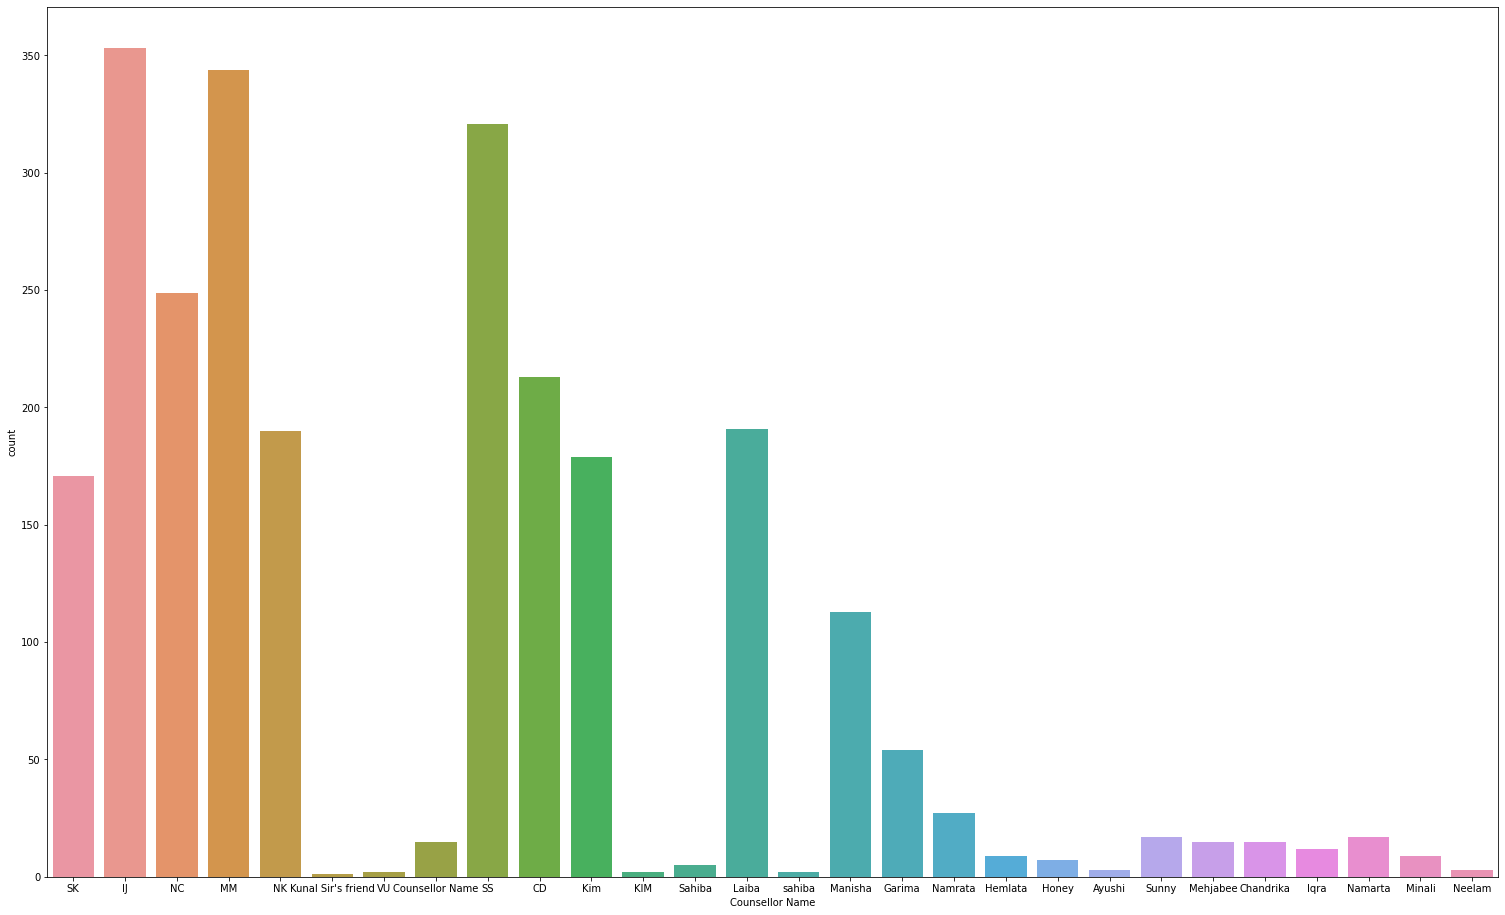

In [9]:
plt.figure(figsize=(26,16))
sns.countplot(x='Counsellor Name',data=new_df)

In [10]:
x=new_df.isnull().any()
sum(x)

6

In [11]:
new_df.isnull().sum()

0
Month              159
Counsellor Name    339
Course Name        500
Fees Total         339
Fees Received      344
Fees Pending       320
dtype: int64

In [12]:
#Dropping empty rows
new_df.dropna(how = 'all', inplace=True)
new_df.head()

,Month,Counsellor Name,Course Name,Fees Total,Fees Received,Fees Pending
1,2020-04-01 00:00:00,SK,CADM,5000,5000,0
2,2020-04-01 00:00:00,SK,CDCW,7500,7500,0
3,2020-04-01 00:00:00,SK,CDCW,9500,9500,0
4,2020-04-01 00:00:00,IJ,NaN,9500,9500,0
5,2020-04-01 00:00:00,NC,NaN,6000,6000,0


<AxesSubplot:>

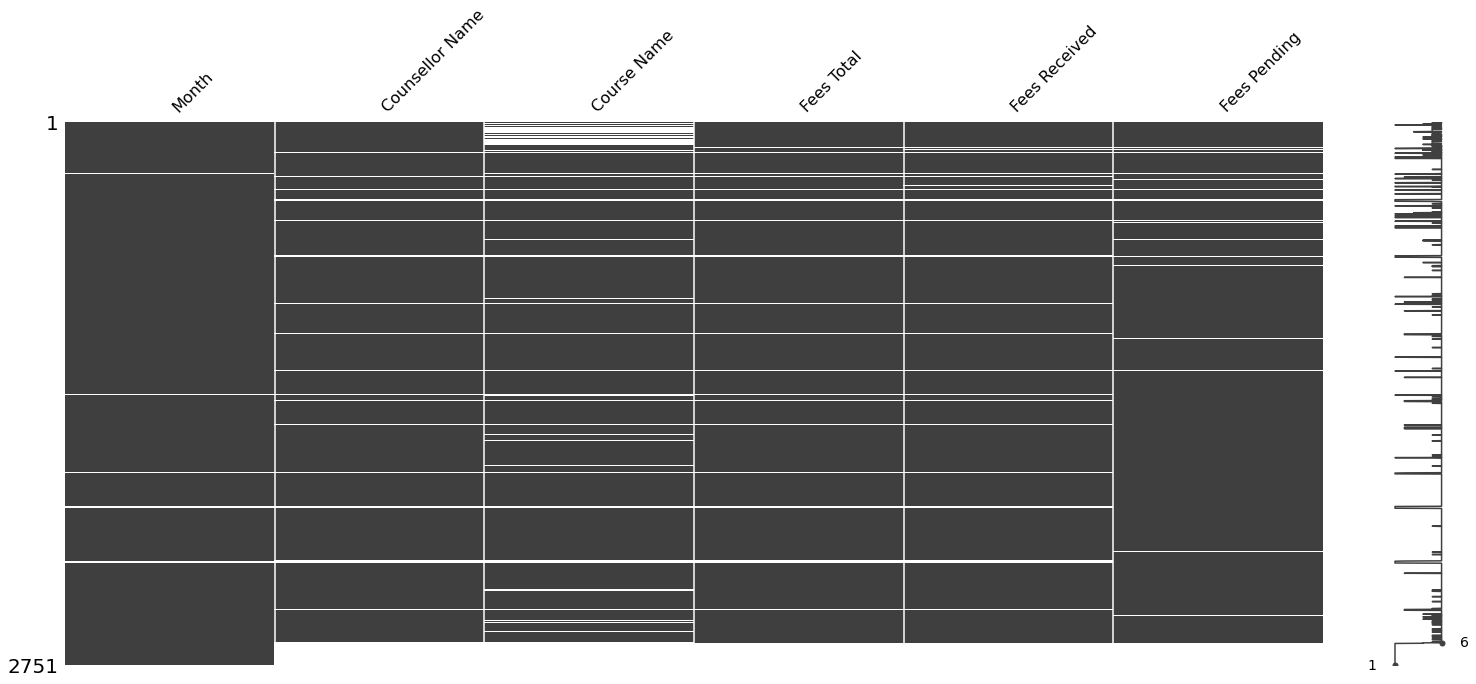

In [13]:
import missingno as msno
msno.matrix(new_df)

In [14]:
new_df.dropna(thresh=new_df.shape[1]-2, axis=0, inplace=True)

<AxesSubplot:>

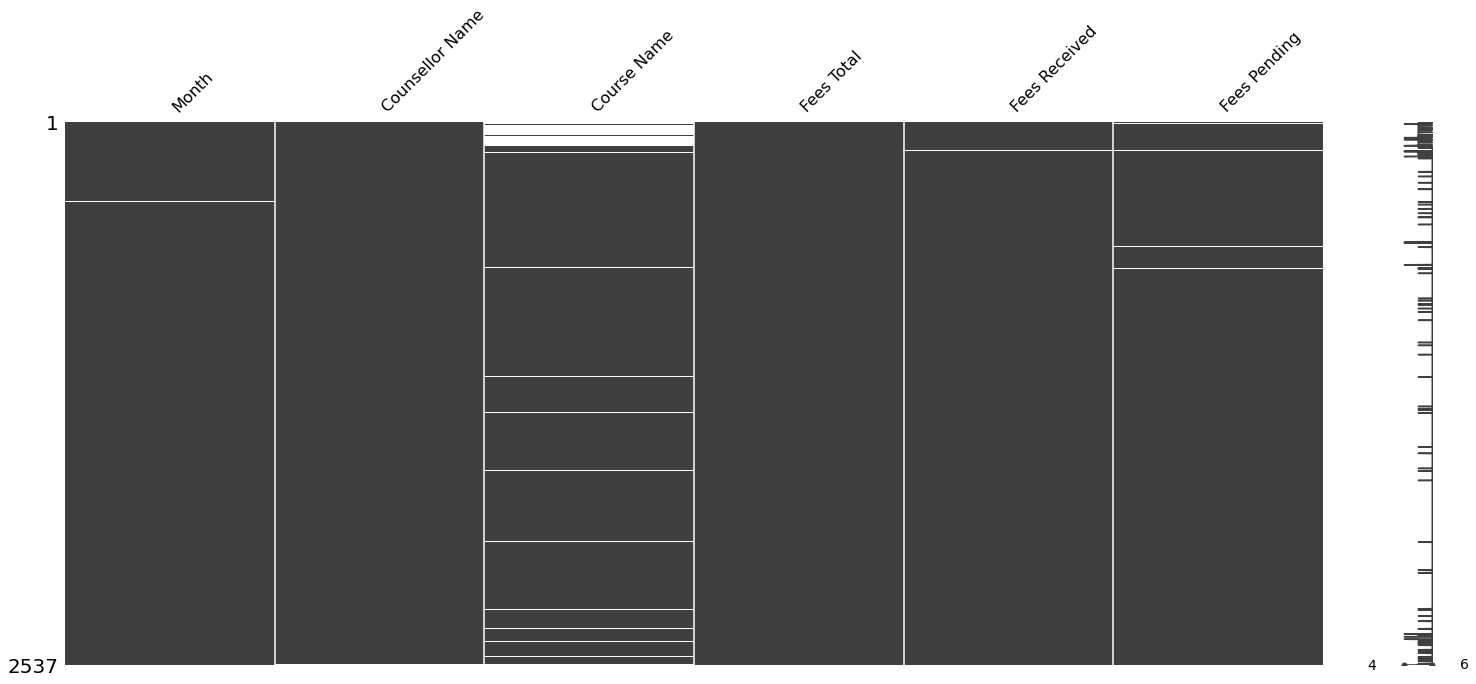

In [15]:
msno.matrix(new_df)

In [16]:
new_df.shape

(2537, 6)

In [17]:
#Removing Duplicates
dup_bool = new_df.duplicated(['Month', 'Counsellor Name', 'Course Name', 'Fees Total', 'Fees Received', 'Fees Pending'])
dups = sum(dup_bool) # by considering all columns.
print("Number of duplicate rows in dataset = {}".format(dups))

Number of duplicate rows in dataset = 838


In [18]:
new_df.drop_duplicates(keep=False,inplace=True)

In [19]:
dup_bool = new_df.duplicated(['Month', 'Counsellor Name', 'Course Name', 'Fees Total', 'Fees Received', 'Fees Pending'])
dups = sum(dup_bool) # by considering all columns.
print("Number of duplicate rows in dataset = {}".format(dups))

Number of duplicate rows in dataset = 0


In [20]:
new_df.shape

(1306, 6)

In [21]:
new_df.isnull().sum().sum()

119

<AxesSubplot:>

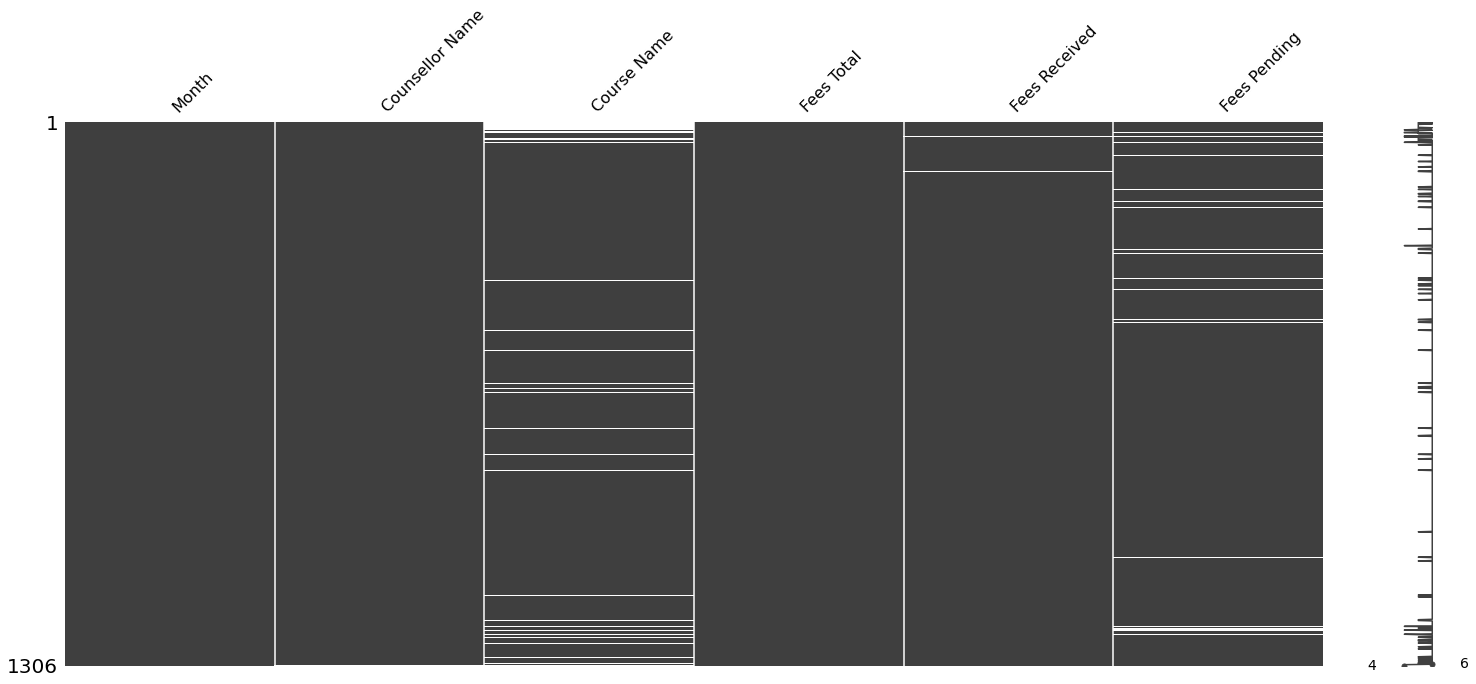

In [22]:
msno.matrix(new_df)

In [23]:
#Deleting the rows having atleast one NaN value.  
new_df.dropna(inplace=True)

<AxesSubplot:>

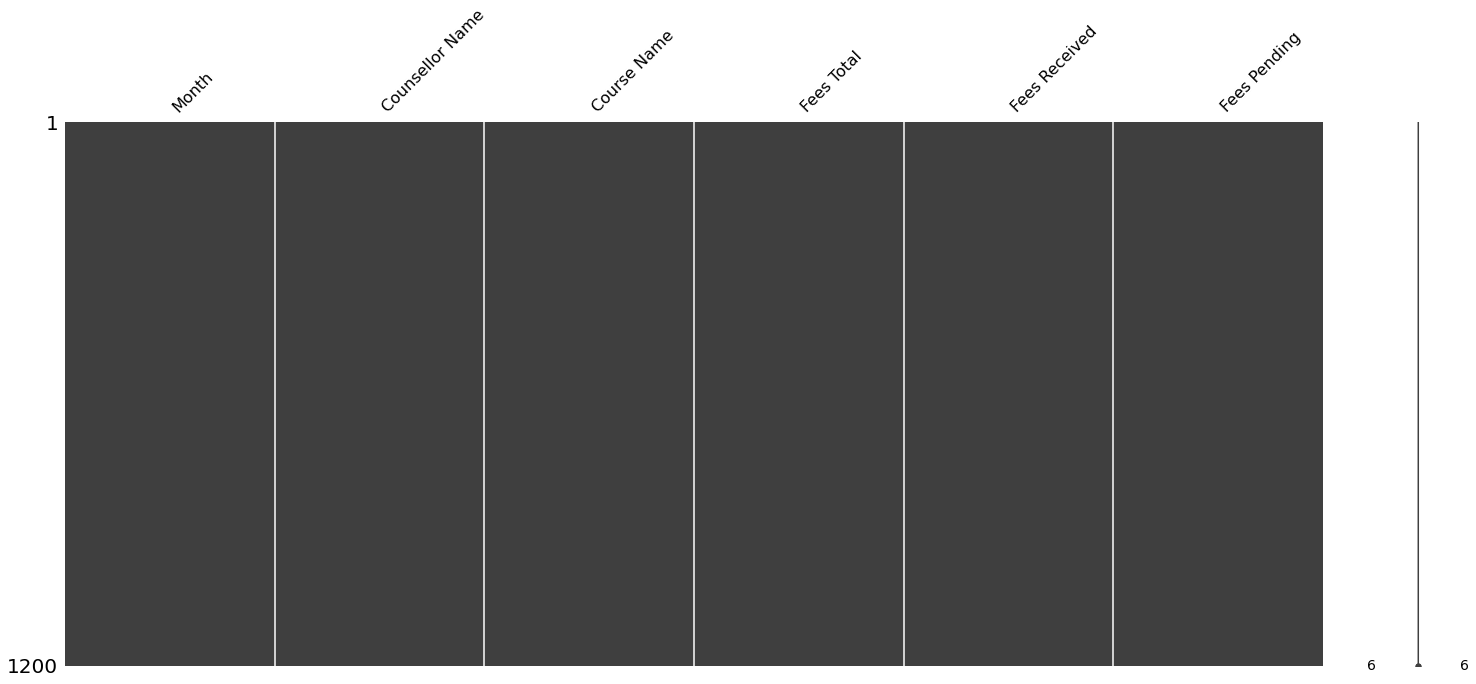

In [24]:
msno.matrix(new_df)

In [25]:
#Checking for the NaN values.
print(new_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 1 to 2761
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Month            1200 non-null   object
 1   Counsellor Name  1200 non-null   object
 2   Course Name      1200 non-null   object
 3   Fees Total       1200 non-null   object
 4   Fees Received    1200 non-null   object
 5   Fees Pending     1200 non-null   object
dtypes: object(6)
memory usage: 65.6+ KB
None


In [26]:
for i in new_df.columns:
    print(new_df[i].unique())
    print("\n")

[datetime.datetime(2020, 4, 1, 0, 0) datetime.datetime(2020, 5, 1, 0, 0)
 'megh' datetime.datetime(2020, 6, 1, 0, 0)
 datetime.datetime(2020, 7, 1, 0, 0) datetime.datetime(2020, 8, 1, 0, 0)
 datetime.datetime(2020, 9, 1, 0, 0) datetime.datetime(2020, 10, 1, 0, 0)
 datetime.datetime(2020, 11, 1, 0, 0) datetime.datetime(2020, 12, 1, 0, 0)
 datetime.datetime(2021, 1, 1, 0, 0) datetime.datetime(2021, 2, 1, 0, 0)
 datetime.datetime(2021, 3, 1, 0, 0) datetime.datetime(2021, 4, 1, 0, 0)
 datetime.datetime(2021, 5, 1, 0, 0) datetime.datetime(2021, 6, 1, 0, 0)
 datetime.datetime(2021, 7, 1, 0, 0)]


['SK' 'NK' 'IJ' 'MM' 'NC' 'SS' 'Counsellor Name' 'CD' 'Kim' 'KIM' 'Sahiba'
 'Laiba' 'sahiba' 'Manisha' 'Garima' 'Namrata' 'Hemlata' 'Honey' 'Ayushi'
 'Sunny' 'Iqra' 'Namarta' 'Chandrika' 'Neelam' 'Mehjabee' 'Minali']


['CADM' 'CDCW' 'Creative Writing' 'CDCW+ CADM' 'Technical Writer'
 'CDCW+Creative Writing' 'CDCW+CADM' 'CDCW+CREATIVE' 'SSGB' 'Course Name'
 'CDCW+Creative Writting' 'Creative Writtin

In [27]:
new_df["Fees Total"].replace({"CARRY FORW": "0", "Fees Total": "0", "Carry forwarded":"0"}, inplace=True)
new_df["Fees Received"].replace({"CARRY FORW": "0", "Fees Total": "0", "Carry forwarded":"0"}, inplace=True)
new_df["Fees Pending"].replace({"CARRY FORW": "0", "Fees Total": "0", "Carry forwarded":"0"}, inplace=True)


In [28]:
new_df["Fees Received"].replace({"Fees Received": "0", "Fees Total": "0", "Carry forwarded":"0"}, inplace=True)
new_df["Fees Pending"].replace({"Fees Pending": "0", "Fees Total": "0", "Carry forwarded":"0"}, inplace=True)

In [29]:
for i in new_df.columns:
    print(new_df[i].unique())
    print("\n")

[datetime.datetime(2020, 4, 1, 0, 0) datetime.datetime(2020, 5, 1, 0, 0)
 'megh' datetime.datetime(2020, 6, 1, 0, 0)
 datetime.datetime(2020, 7, 1, 0, 0) datetime.datetime(2020, 8, 1, 0, 0)
 datetime.datetime(2020, 9, 1, 0, 0) datetime.datetime(2020, 10, 1, 0, 0)
 datetime.datetime(2020, 11, 1, 0, 0) datetime.datetime(2020, 12, 1, 0, 0)
 datetime.datetime(2021, 1, 1, 0, 0) datetime.datetime(2021, 2, 1, 0, 0)
 datetime.datetime(2021, 3, 1, 0, 0) datetime.datetime(2021, 4, 1, 0, 0)
 datetime.datetime(2021, 5, 1, 0, 0) datetime.datetime(2021, 6, 1, 0, 0)
 datetime.datetime(2021, 7, 1, 0, 0)]


['SK' 'NK' 'IJ' 'MM' 'NC' 'SS' 'Counsellor Name' 'CD' 'Kim' 'KIM' 'Sahiba'
 'Laiba' 'sahiba' 'Manisha' 'Garima' 'Namrata' 'Hemlata' 'Honey' 'Ayushi'
 'Sunny' 'Iqra' 'Namarta' 'Chandrika' 'Neelam' 'Mehjabee' 'Minali']


['CADM' 'CDCW' 'Creative Writing' 'CDCW+ CADM' 'Technical Writer'
 'CDCW+Creative Writing' 'CDCW+CADM' 'CDCW+CREATIVE' 'SSGB' 'Course Name'
 'CDCW+Creative Writting' 'Creative Writtin

In [30]:
new_df["Fees Total"] = pd.to_numeric(new_df["Fees Total"])
new_df["Fees Received"] = pd.to_numeric(new_df["Fees Received"])
new_df["Fees Pending"] = pd.to_numeric(new_df["Fees Pending"])

In [31]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 1 to 2761
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Month            1200 non-null   object 
 1   Counsellor Name  1200 non-null   object 
 2   Course Name      1200 non-null   object 
 3   Fees Total       1200 non-null   float64
 4   Fees Received    1200 non-null   float64
 5   Fees Pending     1200 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 65.6+ KB


In [32]:
new_df.tail()

,Month,Counsellor Name,Course Name,Fees Total,Fees Received,Fees Pending
2740,2021-07-01 00:00:00,Neelam,CDCW,4000.0,4000.0,0
2742,2021-07-01 00:00:00,Namarta,CCWS,9500.0,5000.0,4500
2743,2021-07-01 00:00:00,Sunny,CDCW,13500.0,6750.0,6750
2753,2021-07-01 00:00:00,Laiba,caws,2700.0,2700.0,0
2761,2021-07-01 00:00:00,Namarta,CDCW+Creative,20000.0,15000.0,5000


<AxesSubplot:xlabel='Counsellor Name', ylabel='Fees Total'>

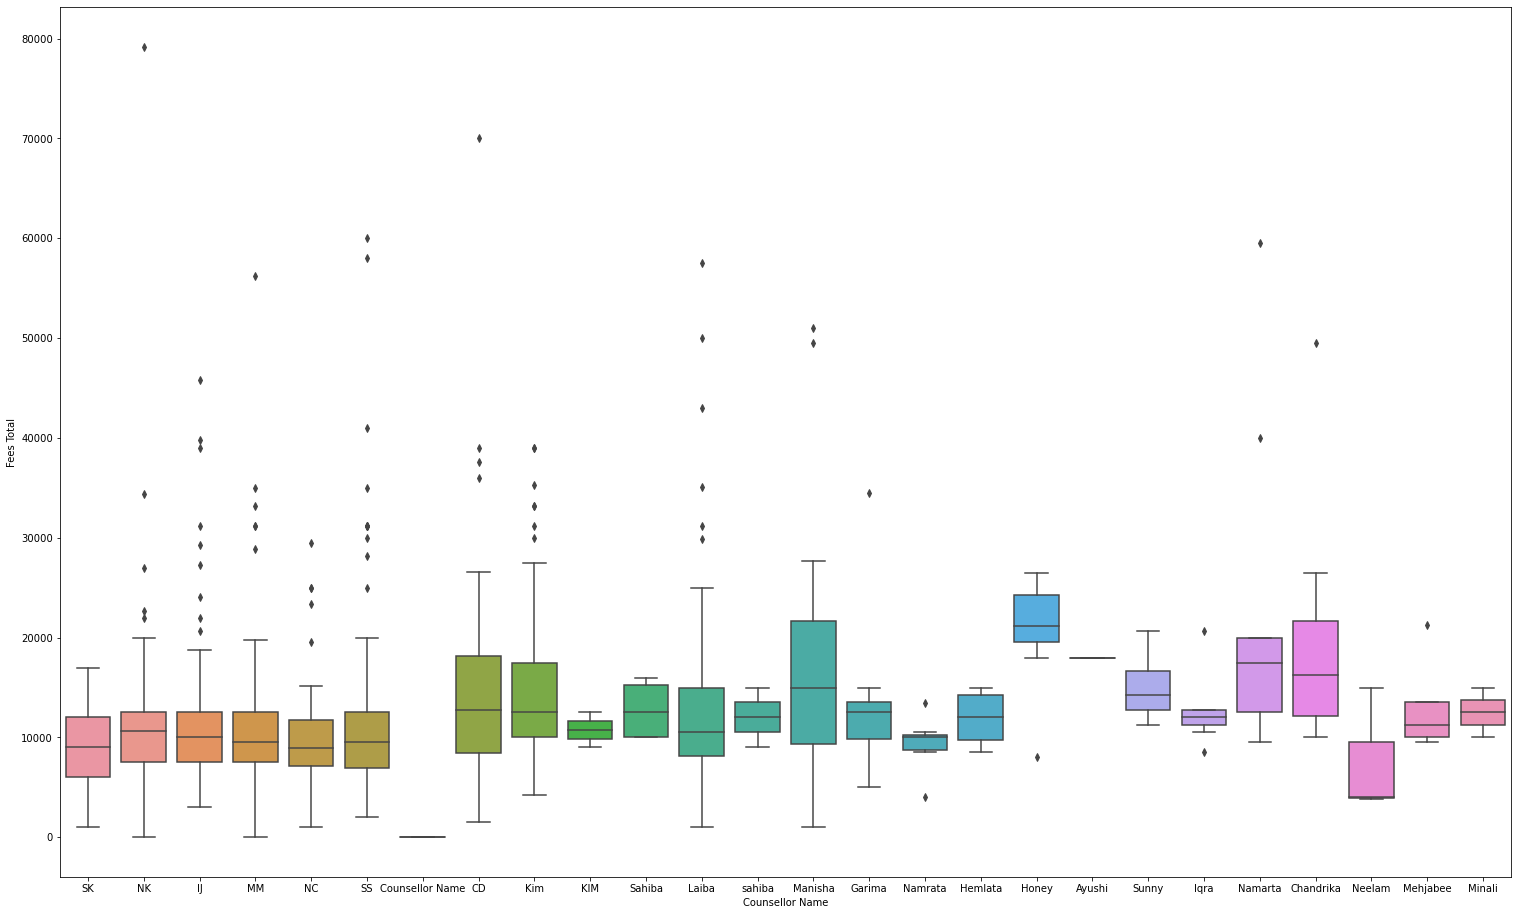

In [33]:
plt.figure(figsize=(26,16))
sns.boxplot(x='Counsellor Name',y='Fees Total',data=new_df)

In [34]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [35]:
x=new_df.set_index('Month').copy()

In [36]:
x.head()

,Counsellor Name,Course Name,Fees Total,Fees Received,Fees Pending
Month,,,,,
2020-04-01 00:00:00,SK,CADM,5000.0,5000.0,0
2020-04-01 00:00:00,SK,CDCW,9000.0,9000.0,0
2020-04-01 00:00:00,SK,CDCW,6000.0,6000.0,0
2020-04-01 00:00:00,SK,CDCW,7000.0,7000.0,0
2020-04-01 00:00:00,SK,CDCW,12500.0,12500.0,0


<AxesSubplot:xlabel='Month'>

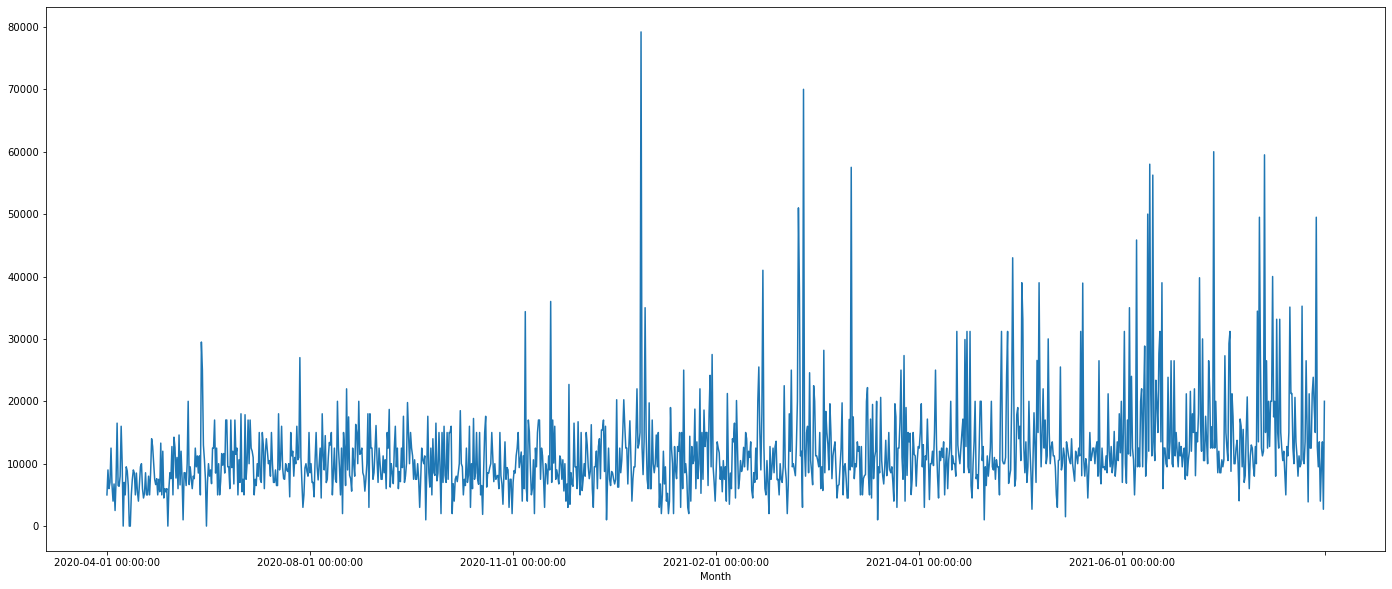

In [37]:
x['Fees Total'].plot(figsize=(24,10))

In [38]:
from statsmodels.tsa.stattools import adfuller

In [51]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [41]:
stepwise_fit=auto_arima(x['Fees Total'],trace=True,supress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=25567.314, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=25199.691, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=25565.316, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=25067.743, Time=0.07 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=24978.722, Time=0.09 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=24910.145, Time=0.14 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=24888.749, Time=0.15 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.29 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.92 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=24886.754, Time=0.14 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=24908.149, Time=0.11 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=24779.109, Time=0.54 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=2

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1200
Model:               SARIMAX(5, 1, 1)   Log Likelihood              -12382.554
Date:                Fri, 30 Jul 2021   AIC                          24779.109
Time:                        18:55:33   BIC                          24814.734
Sample:                             0   HQIC                         24792.529
                               - 1200                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0120      0.032      0.369      0.712      -0.052       0.076
ar.L2          0.0451      0.027      1.663      0.096      -0.008       0.098
ar.L3          0.0221      0.028      0.787      0.431      -0.033       0.077
ar.L4          0.0574      0.025      2.270      0.023       0.008       0.107
ar.L5          0.0868      0.021      4.111      0.000       0.045       0.128
ma.L1         -0.9865      0.006   -156.471      0.000      -0.999      -0.974
sigma2       6.01e+07   1.87e-10   3.22e+17      0.000    6.01e+07    6.01e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             11174.21
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               4.48   Skew:                             2.75
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.2e+31. Standard errors may be unstable.
"""

In [42]:
from statsmodels.tsa.arima_model import ARIMA

In [43]:
print(x.shape)

(1200, 5)


In [44]:
train=x.iloc[:-30]
test=x.iloc[-30:]
print(train.shape ,test.shape)

(1170, 5) (30, 5)


In [45]:
model=ARIMA(train['Fees Total'],order=(5,1,1))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Fees Total   No. Observations:                 1169
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -12055.218
Method:                       css-mle   S.D. of innovations           7264.101
Date:                Fri, 30 Jul 2021   AIC                          24126.435
Time:                        18:55:35   BIC                          24166.947
Sample:                             1   HQIC                         24141.715
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.7556      0.843      8.011      0.000       5.103       8.409
ar.L1.D.Fees Total     0.0186      0.029      0.640      0.522      -0.038       0.076
ar.L2.D.Fees Total     0.0549      0.029      1.890      0.059      -0.002       0.112
ar.L3.D.Fees Total     0.0177      0.029      0.608      0.543      -0.039       0.075
ar.L4.D.Fees Total     0.0637      0.029      2.194      0.028       0.007       0.121
ar.L5.D.Fees Total     0.1018      0.029      3.488      0.000       0.045       0.159
ma.L1.D.Fees Total    -1.0000      0.005   -207.010      0.000      -1.009      -0.990
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4087           -0.0000j            1.4087           -0.0000
AR.2            0.3977           -1.5273j            1.5783           -0.2095
AR.3            0.3977           +1.5273j            1.5783            0.2095
AR.4           -1.4152           -0.8933j            1.6736           -0.4104
AR.5           -1.4152           +0.8933j            1.6736            0.4104
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [46]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
pred.index=x.index[start:end+1]
print(pred)

Month
2021-07-01    18004.471459
2021-07-01    16457.475809
2021-07-01    16271.231905
2021-07-01    15279.814063
2021-07-01    15484.464502
2021-07-01    16151.471103
2021-07-01    15993.349100
2021-07-01    15953.528223
2021-07-01    15873.088978
2021-07-01    15934.955926
2021-07-01    15993.803708
2021-07-01    15983.268928
2021-07-01    15983.240867
2021-07-01    15984.482088
2021-07-01    15999.383901
2021-07-01    16010.067373
2021-07-01    16015.054268
2021-07-01    16021.094984
2021-07-01    16027.767694
2021-07-01    16035.530444
2021-07-01    16042.574616
2021-07-01    16049.163923
2021-07-01    16055.872087
2021-07-01    16062.678555
2021-07-01    16069.550457
2021-07-01    16076.328975
2021-07-01    16083.072373
2021-07-01    16089.829506
2021-07-01    16096.597487
2021-07-01    16103.366511
dtype: float64


In [48]:
test['Fees Total'].mean()

15302.5

In [49]:
model2=ARIMA(x['Fees Total'],order=(5,1,1))
model2=model2.fit()
new_df.tail()

,Month,Counsellor Name,Course Name,Fees Total,Fees Received,Fees Pending
2740,2021-07-01 00:00:00,Neelam,CDCW,4000.0,4000.0,0
2742,2021-07-01 00:00:00,Namarta,CCWS,9500.0,5000.0,4500
2743,2021-07-01 00:00:00,Sunny,CDCW,13500.0,6750.0,6750
2753,2021-07-01 00:00:00,Laiba,caws,2700.0,2700.0,0
2761,2021-07-01 00:00:00,Namarta,CDCW+Creative,20000.0,15000.0,5000


In [50]:
index_future_dates=pd.date_range(start='2021-08-01',end='2021-09-01')
print(index_future_dates)
pred=model2.predict(start=len(x),end=len(x)+31,typ='levels').rename('ARIMA Productions')
pred.index=index_future_dates
print(pred)

DatetimeIndex(['2021-08-01', '2021-08-02', '2021-08-03', '2021-08-04',
               '2021-08-05', '2021-08-06', '2021-08-07', '2021-08-08',
               '2021-08-09', '2021-08-10', '2021-08-11', '2021-08-12',
               '2021-08-13', '2021-08-14', '2021-08-15', '2021-08-16',
               '2021-08-17', '2021-08-18', '2021-08-19', '2021-08-20',
               '2021-08-21', '2021-08-22', '2021-08-23', '2021-08-24',
               '2021-08-25', '2021-08-26', '2021-08-27', '2021-08-28',
               '2021-08-29', '2021-08-30', '2021-08-31', '2021-09-01'],
              dtype='datetime64[ns]', freq='D')
2021-08-01    13846.566398
2021-08-02    15078.249039
2021-08-03    14951.408222
2021-08-04    14932.245206
2021-08-05    16166.142969
2021-08-06    15700.228343
2021-08-07    15863.374541
2021-08-08    15867.450678
2021-08-09    15942.692292
2021-08-10    16037.572582
2021-08-11    16015.432511
2021-08-12    16041.949483
2021-08-13    16053.788101
2021-08-14    16072.457502
2021-